# **Lab 6: Optimization and learning**
**Martin Börjeson**

# **Abstract**

In this lab I've implemented a gradient descent method with variable step size. The step size was chosen using a bisection linear search, and the gradient descent is the classic non-stochastic version. 

The method performed well, reaches a stationary point in just a few iterations, and seems to work as intended.

#**About the code**

The code is written by me, Martin Börjeson.

In [ ]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# Report by Martin Börjeson

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [ ]:
# Load neccessary modules.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

matplotlib.rcParams['figure.figsize'] = [10, 8]

# **Introduction**

The gradient descent method is a straightforward method for finding local minima (or at least stationary points) in a multivariable function. The idea is to always travel in the direction which steepest, much in the same way a droplet of water would flow along a mountainside. It requires a starting point, and an objective function to search along. The gradient of the objective function can either be provided, or estimated using an approximation of the definition of a derivative.

A variable which the implementer is in theory free to choose on their own is the step length in each iteration. Larger step lengths will decrease the number of steps in the iteration, whereas smaller steps will increase the accuracy of the result. A variable step length can also be implemented, which takes larger steps as long as going in a straight line will decrease the returned value of the objective function.

## **Method**



# Gradient descent method in $R^n$

I've implemented a gradient descent method which uses a variable step length. The step length is chosen by finding the value $s$ which minimizes the objective function along the current gradient.

$LineSearch(f,s) = min(f(i))$ where $i \in [0,s]$ and $f(i) = f_o(x -i \nabla f_o(x))$ and $f_o(x)$ is the objective function.

The linesearch is a done using bisection.

Input: objective function $f_o(x)$

Output: stationary point $x^*$ such that $|| grad(f_o)(x*) || < TOL$

In [298]:
def line_search(f,s,tol = 10**-3):
  a = 0
  b = s
  while (b-a)/2 > tol:
    x = (a+b)/2
    if (f((a+x)/2)>f((b+x)/2)):
      a = x
    else:
      b = x
  return x

def grad_descent(f,x0, df=lambda x: (f(x+10**-12)-f(x))/10**-12, max_s=10, tol = 10**-6):
  x = x0
  all = [x.copy()]
  i = 0
  while (np.linalg.norm(df(x))>tol):
    a = line_search(lambda s: f(x-s*df(x)),max_s)
    x-=a*df(x)
    i+=1
    all.append(x.copy())
  print("Iterations:",i)
  return x,np.array(all)

# **Results**

Below are a limited set of tests for the varies methods.

# Gradient descent method in $R^n$

Test: Verify accuracy and convergence with respect to exact solution.

I'm using an objective function in $R^2$ to test the gradient descent, as that the search can be visualized using a 3d plot.

The objective function I'm testing is $f_o([x_1,x_2]^T)=sin(x_1)+cos(x_2)$, which has both local minima and saddle points. The local minima points are all $f_o(x_1,x_2) = -2$

I'm really sorry about how messy this code is. 3d plots are not fun.

max_s = 0.1
Iterations: 173
f(x) = -1.9999999999995903

max_s = 10
Iterations: 4
f(x) = -1.9999999999997344



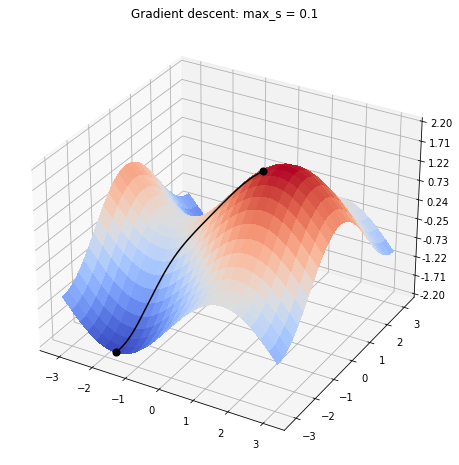

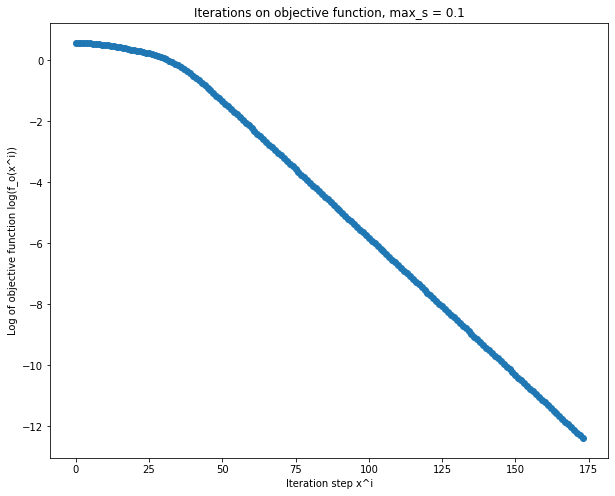

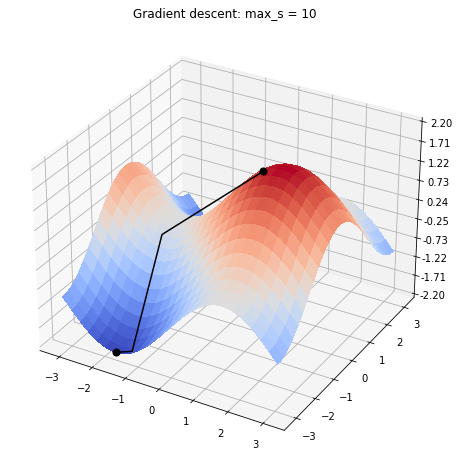

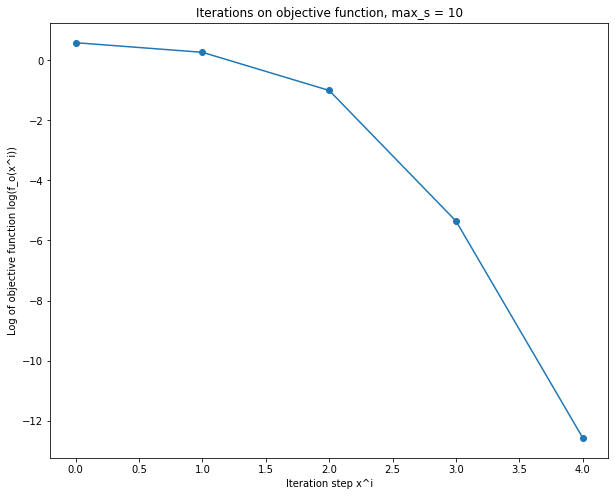

In [300]:
#TESTS:
def f(x):
  return np.sin(x[0])+np.cos(x[1])

def df(x):
  return np.array([np.cos(x[0]),-np.sin(x[1])])

x0 = np.array([1.0,-0.1])



ax = plt.figure().add_subplot(projection='3d',computed_zorder=False)

print("max_s =",0.1)
x,allx = grad_descent(f,x0,df=df,max_s=0.1)
print("f(x) =",f(x))
print()


s = 51
X = np.array(np.linspace(-3.14,3.14,s))
Y = np.array(np.linspace(-3.14,3.14,s))
X,Y = np.meshgrid(X,Y)
Z = np.sin(X)+np.cos(Y)

y = []
for i in allx:
  y.append(f(i))
y = np.array(y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.plot(allx[:,0],allx[:,1],y,'-',c='k')
ax.scatter(allx[0,0],allx[0,1],f(allx[0,:]),s=50,c='k')
ax.scatter(allx[-1,0],allx[-1,1],f(allx[-1,:]),s=50,c='k')
ax.set_title('Gradient descent: max_s = 0.1')

ax = plt.figure().add_subplot()
ax.set_title('Iterations on objective function, max_s = 0.1')
ax.set_xlabel('Iteration step x^i')
ax.set_ylabel('Log of objective function log(f_o(x^i))')

plt.plot(np.log10(y+2),'-o')
#plt.plot((-12/140)*np.array(range(len(y))),label='log of objective function')


x0 = np.array([1.0,-0.1])

ax = plt.figure().add_subplot(projection='3d',computed_zorder=False)

print("max_s =",10)
x,allx = grad_descent(f,x0,df=df,max_s=10)
print("f(x) =",f(x))
print()

y = []
for i in allx:
  y.append(f(i))
y = np.array(y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.plot(allx[:,0],allx[:,1],y,'-',c='k')
ax.scatter(allx[0,0],allx[0,1],f(allx[0,:]),s=50,c='k')
ax.scatter(allx[-1,0],allx[-1,1],f(allx[-1,:]),s=50,c='k')
ax.set_title('Gradient descent: max_s = 10')

ax = plt.figure().add_subplot()
ax.set_title('Iterations on objective function, max_s = 10')
ax.set_xlabel('Iteration step x^i')
ax.set_ylabel('Log of objective function log(f_o(x^i))')
plt.plot(np.log10(y+2),'-o')
#plt.plot((-7)*np.array(range(len(y))))
plt.show()

Allowing for larger step sizes drastically reduced the number of iterations required to reach the stationary point from 173 steps to 4. Both versions reach the stationary point with the required accuracy. The convergence is exponential with a small step size, as we can see from the linear convergence in the logplot. There aren't enough iteration steps for the larger step size to see the same linear convergence, but the line does appears to get straighter in the last iteration.

# **Discussion**

I was impressed with how few steps were required by the algorithm to reach a stationary point when the step size was allowed to be sufficiently large. The algorithm did sometimes get stuck on a saddle point for certain initial values (such as (0,0)), but that is expected behaviour. I was uncertain as to how exactly to select the maximum step size, as I ideally want it to be large enough to contain a local minima between the endpoints, and I'm still not certain if just selecting a pretty large value is the best approach.

I also tried not supplying a direct gradient function, which worked but gave pretty bad approximations which were closer to -1.95 rather than -2.